# Visualize E-GEOD-33245 patterns
This notebook will examine patterns of generic and experiment-specific genes using E-GEOD-33245 as the template experiment

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Load data
grp_1v2_file = "generic_gene_summary_E-GEOD-33245_1v2.tsv"
grp_1v3_file = "generic_gene_summary_E-GEOD-33245_1v3.tsv"

In [3]:
# Read data
grp_1v2 = pd.read_csv(grp_1v2_file, sep="\t", header=0, index_col=0)
grp_1v3 = pd.read_csv(grp_1v3_file, sep="\t", header=0, index_col=0)

In [4]:
grp_1v2.head()

,Gene ID,Adj P-value (Real),Rank (Real),Test statistic (Real),Median adj p-value (simulated),Rank (simulated),Mean test statistic (simulated),Std deviation (simulated),Number of experiments (simulated),Z score,Gene Name
PA5530,PA5530,0.000088,5549.0,4.2550,0.658782,5151.0,0.49472,0.443135,25,8.485636,NaN
PA0523,PA0523,0.001303,5548.0,3.5580,0.856209,5390.0,0.45682,0.290028,25,10.692710,norC
PA0524,PA0524,0.001303,5547.0,3.2585,0.698655,5430.0,0.57044,0.331890,25,8.099239,norB
PA5332,PA5332,0.053071,5546.0,2.9380,0.950597,2092.0,0.11008,0.079361,25,35.633647,crc
PA3874,PA3874,0.006250,5545.0,2.8230,0.826863,4875.5,0.33770,0.229561,25,10.826302,narH


In [5]:
grp_1v3.head()

,Gene ID,Adj P-value (Real),Rank (Real),Test statistic (Real),Median adj p-value (simulated),Rank (simulated),Mean test statistic (simulated),Std deviation (simulated),Number of experiments (simulated),Z score,Gene Name
PA4726,PA4726,0.000010,5549.0,4.5310,0.962165,3657.0,0.12436,0.076626,25,57.508783,cbrB
PA1985,PA1985,0.000927,5548.0,2.9735,0.969671,5549.0,0.42170,0.278023,25,9.178372,pqqA
PA4131,PA4131,0.000348,5547.0,2.8815,0.964949,5520.0,0.32658,0.217609,25,11.740890,NaN
PA4739,PA4739,0.000223,5546.0,2.7850,0.962165,5452.0,0.33814,0.430420,25,5.684825,NaN
PA1216,PA1216,0.000223,5545.0,2.6005,0.962165,5458.0,0.30262,0.202536,25,11.345563,NaN


In [6]:
merged_df = grp_1v2.merge(grp_1v3, left_on='Gene ID', right_on="Gene ID", suffixes=["_grp_1v2", "_grp_1v3"])

In [7]:
merged_df.head()

,Gene ID,Adj P-value (Real)_grp_1v2,Rank (Real)_grp_1v2,Test statistic (Real)_grp_1v2,Median adj p-value (simulated)_grp_1v2,Rank (simulated)_grp_1v2,Mean test statistic (simulated)_grp_1v2,Std deviation (simulated)_grp_1v2,Number of experiments (simulated)_grp_1v2,Z score_grp_1v2,...,Adj P-value (Real)_grp_1v3,Rank (Real)_grp_1v3,Test statistic (Real)_grp_1v3,Median adj p-value (simulated)_grp_1v3,Rank (simulated)_grp_1v3,Mean test statistic (simulated)_grp_1v3,Std deviation (simulated)_grp_1v3,Number of experiments (simulated)_grp_1v3,Z score_grp_1v3,Gene Name_grp_1v3
0,PA5530,0.000088,5549.0,4.2550,0.658782,5151.0,0.49472,0.443135,25,8.485636,...,0.395383,3996.5,0.3175,0.969671,4025.0,0.21108,0.292025,25,0.364421,NaN
1,PA0523,0.001303,5548.0,3.5580,0.856209,5390.0,0.45682,0.290028,25,10.692710,...,0.425676,4652.0,0.4245,0.970813,5215.5,0.22378,0.195986,25,1.024156,norC
2,PA0524,0.001303,5547.0,3.2585,0.698655,5430.0,0.57044,0.331890,25,8.099239,...,0.485255,3918.0,0.3065,0.969671,5139.0,0.25394,0.210468,25,0.249729,norB
3,PA5332,0.053071,5546.0,2.9380,0.950597,2092.0,0.11008,0.079361,25,35.633647,...,0.441874,3803.5,0.2925,0.981874,2725.5,0.09666,0.079667,25,2.458221,crc
4,PA3874,0.006250,5545.0,2.8230,0.826863,4875.5,0.33770,0.229561,25,10.826302,...,0.000348,5542.0,2.5420,0.962749,3008.0,0.20082,0.229705,25,10.192097,narH


In [8]:
# Add max(z-score of 1v2, z-score 1v3) to color by
merged_df['mean Z score'] = abs(merged_df[['Z score_grp_1v2','Z score_grp_1v3']].mean(axis=1))
merged_df['max Z score'] = abs(merged_df[['Z score_grp_1v2','Z score_grp_1v3']].max(axis=1))
merged_df.head()

,Gene ID,Adj P-value (Real)_grp_1v2,Rank (Real)_grp_1v2,Test statistic (Real)_grp_1v2,Median adj p-value (simulated)_grp_1v2,Rank (simulated)_grp_1v2,Mean test statistic (simulated)_grp_1v2,Std deviation (simulated)_grp_1v2,Number of experiments (simulated)_grp_1v2,Z score_grp_1v2,...,Test statistic (Real)_grp_1v3,Median adj p-value (simulated)_grp_1v3,Rank (simulated)_grp_1v3,Mean test statistic (simulated)_grp_1v3,Std deviation (simulated)_grp_1v3,Number of experiments (simulated)_grp_1v3,Z score_grp_1v3,Gene Name_grp_1v3,mean Z score,max Z score
0,PA5530,0.000088,5549.0,4.2550,0.658782,5151.0,0.49472,0.443135,25,8.485636,...,0.3175,0.969671,4025.0,0.21108,0.292025,25,0.364421,NaN,4.425028,8.485636
1,PA0523,0.001303,5548.0,3.5580,0.856209,5390.0,0.45682,0.290028,25,10.692710,...,0.4245,0.970813,5215.5,0.22378,0.195986,25,1.024156,norC,5.858433,10.692710
2,PA0524,0.001303,5547.0,3.2585,0.698655,5430.0,0.57044,0.331890,25,8.099239,...,0.3065,0.969671,5139.0,0.25394,0.210468,25,0.249729,norB,4.174484,8.099239
3,PA5332,0.053071,5546.0,2.9380,0.950597,2092.0,0.11008,0.079361,25,35.633647,...,0.2925,0.981874,2725.5,0.09666,0.079667,25,2.458221,crc,19.045934,35.633647
4,PA3874,0.006250,5545.0,2.8230,0.826863,4875.5,0.33770,0.229561,25,10.826302,...,2.5420,0.962749,3008.0,0.20082,0.229705,25,10.192097,narH,10.509199,10.826302


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


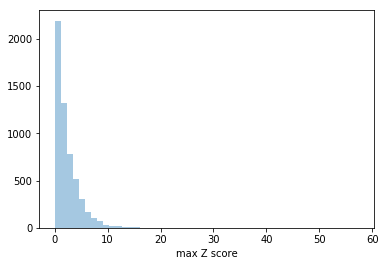

In [9]:
sns.distplot(merged_df['max Z score'], kde=False)

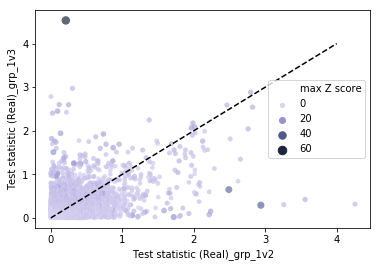

In [11]:
cmap = sns.cubehelix_palette(start=2.8, rot=.1, as_cmap=True)
sns.scatterplot(data=merged_df,
                #data=merged_df[merged_df["max Z score"]<0.5],
                x="Test statistic (Real)_grp_1v2",
                y="Test statistic (Real)_grp_1v3",
                hue="max Z score",
                size="max Z score",
                linewidth=0,
                alpha=0.7,
                palette=cmap)
plt.plot([0,4],[0,4],"--k")

In [12]:
merged_df[merged_df['max Z score']>20]

,Gene ID,Adj P-value (Real)_grp_1v2,Rank (Real)_grp_1v2,Test statistic (Real)_grp_1v2,Median adj p-value (simulated)_grp_1v2,Rank (simulated)_grp_1v2,Mean test statistic (simulated)_grp_1v2,Std deviation (simulated)_grp_1v2,Number of experiments (simulated)_grp_1v2,Z score_grp_1v2,...,Test statistic (Real)_grp_1v3,Median adj p-value (simulated)_grp_1v3,Rank (simulated)_grp_1v3,Mean test statistic (simulated)_grp_1v3,Std deviation (simulated)_grp_1v3,Number of experiments (simulated)_grp_1v3,Z score_grp_1v3,Gene Name_grp_1v3,mean Z score,max Z score
3,PA5332,0.053071,5546.0,2.9380,0.950597,2092.0,0.11008,0.079361,25,35.633647,...,0.2925,0.981874,2725.5,0.09666,0.079667,25,2.458221,crc,19.045934,35.633647
10,PA0755,0.001303,5539.0,2.4905,0.931534,2117.0,0.10894,0.072490,25,32.853510,...,0.6505,0.975162,2364.0,0.08684,0.063120,25,8.929922,opdH,20.891716,32.853510
53,PA0753,0.008576,5496.0,1.7200,0.918151,1784.5,0.09190,0.079243,25,20.545723,...,0.0205,0.973143,1518.5,0.07536,0.072750,25,-0.754089,NaN,9.895817,20.545723
2543,PA4726,0.876793,3005.0,0.2105,0.870570,1928.5,0.11778,0.096139,25,0.964435,...,4.5310,0.962165,3657.0,0.12436,0.076626,25,57.508783,cbrB,29.236609,57.508783


In [13]:
merged_df.to_csv("merged_E-GEOD_1v2_1v3.tsv", sep="\t")